In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data and Pre-Processing

In [2]:
Dataset=pd.read_csv("raw_Data.csv")

In [3]:
Dataset.head()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SurgDate  241 non-null    object
 1   DOW       241 non-null    object
 2   T - 28    241 non-null    int64 
 3   T - 21    241 non-null    int64 
 4   T - 14    241 non-null    int64 
 5   T - 13    241 non-null    int64 
 6   T - 12    241 non-null    int64 
 7   T - 11    241 non-null    int64 
 8   T - 10    241 non-null    int64 
 9   T - 9     241 non-null    int64 
 10  T - 8     241 non-null    int64 
 11  T - 7     241 non-null    int64 
 12  T - 6     241 non-null    int64 
 13  T - 5     241 non-null    int64 
 14  T - 4     241 non-null    int64 
 15  T - 3     241 non-null    int64 
 16  T - 2     241 non-null    int64 
 17  T - 1     241 non-null    int64 
 18  Actual    241 non-null    int64 
dtypes: int64(17), object(2)
memory usage: 35.9+ KB


In [5]:
Dataset.isnull().sum()

SurgDate    0
DOW         0
T - 28      0
T - 21      0
T - 14      0
T - 13      0
T - 12      0
T - 11      0
T - 10      0
T - 9       0
T - 8       0
T - 7       0
T - 6       0
T - 5       0
T - 4       0
T - 3       0
T - 2       0
T - 1       0
Actual      0
dtype: int64

In [6]:
Dataset.duplicated().sum()

0

## Comparison of weekdays - Histogram

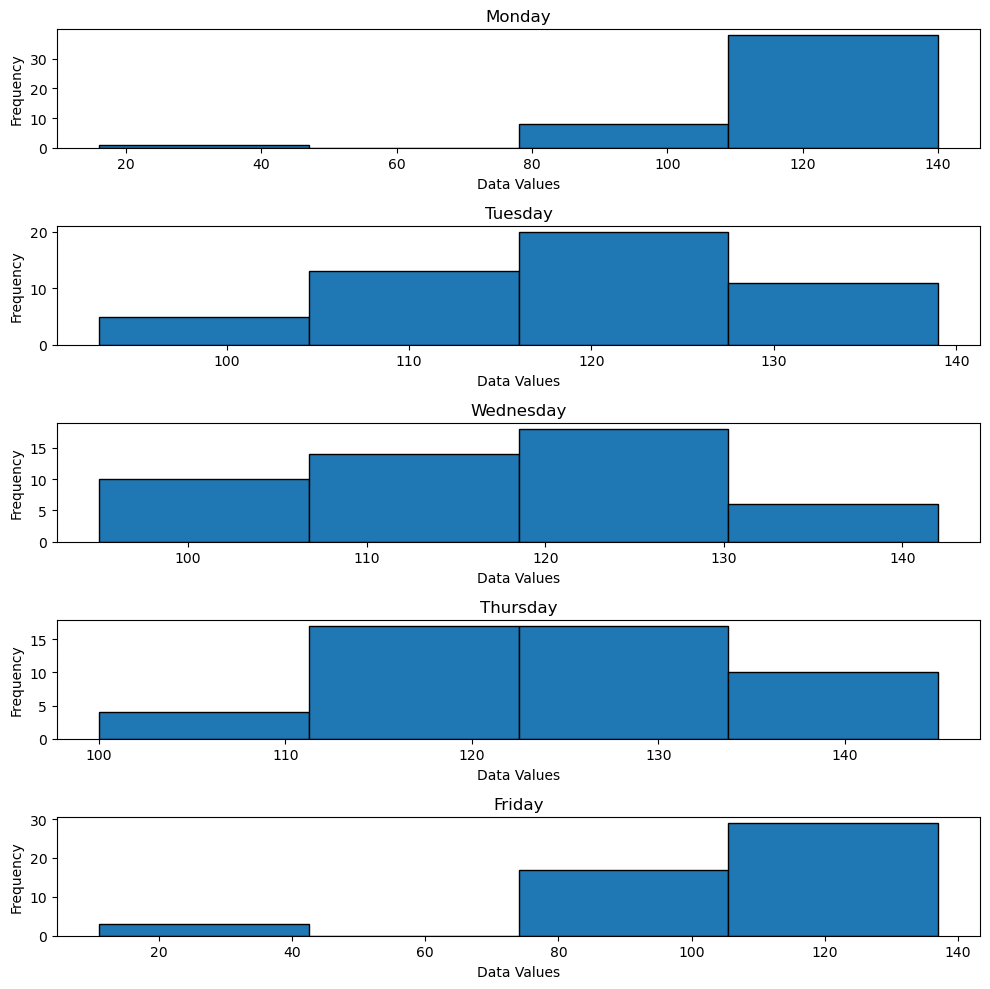

In [149]:
Mon = Dataset[Dataset['DOW']=='Mon']["Actual"].reset_index().drop('index', axis=1)
Tue = Dataset[Dataset['DOW']=='Tue']["Actual"].reset_index().drop('index', axis=1)
Wed = Dataset[Dataset['DOW']=='Wed']["Actual"].reset_index().drop('index', axis=1)
Thu = Dataset[Dataset['DOW']=='Thu']["Actual"].reset_index().drop('index', axis=1)
Fri = Dataset[Dataset['DOW']=='Fri']["Actual"].reset_index().drop('index', axis=1)


fig, axs = plt.subplots(5, 1, figsize=(10, 10))
axs[0].hist(Mon, bins=4, edgecolor='black')
axs[0].set_title('Monday')
axs[0].set_xlabel('Data Values')
axs[0].set_ylabel('Frequency')

axs[1].hist(Tue, bins=4, edgecolor='black')
axs[1].set_title('Tuesday')
axs[1].set_xlabel('Data Values')
axs[1].set_ylabel('Frequency')

axs[2].hist(Wed, bins=4, edgecolor='black')
axs[2].set_title('Wednesday')
axs[2].set_xlabel('Data Values')
axs[2].set_ylabel('Frequency')

axs[3].hist(Thu, bins=4, edgecolor='black')
axs[3].set_title('Thursday')
axs[3].set_xlabel('Data Values')
axs[3].set_ylabel('Frequency')

axs[4].hist(Fri, bins=4, edgecolor='black')
axs[4].set_title('Friday')
axs[4].set_xlabel('Data Values')
axs[4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Statisticall Tests on Sample Averages and Variances

In [159]:
S = pd.concat([Mon,Tue,Wed,Thu,Fri], axis=1, ignore_index=True)
S.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
S.describe()

,Mon,Tue,Wed,Thu,Fri
count,47.000000,49.000000,48.000000,48.000000,49.000000
mean,116.255319,119.081633,117.041667,124.083333,105.612245
std,18.456138,10.864385,11.240047,10.379672,26.357175
min,16.000000,93.000000,95.000000,100.000000,11.000000
25%,111.000000,112.000000,108.000000,116.750000,101.000000
50%,116.000000,120.000000,118.000000,125.000000,108.000000
75%,126.000000,127.000000,125.250000,131.500000,122.000000
max,140.000000,139.000000,142.000000,145.000000,137.000000


--------------------------------------------------------------
It can be seen from the descriptive statistics table that **Thursdays** have the highest average of actual surgeries, because Surgeons possibly prefer to have a lower load of works on the week-end (Fridays) and that's why they take on more surgeries a day before Friday, which is Thursdays. 

In [153]:
from scipy.stats import f_oneway
f_oneway(Mon, Tue, Wed, Thu, Fri)


F_onewayResult(statistic=array([8.00273414]), pvalue=array([4.57528118e-06]))

--------------------------------------------------------------------------------------------------------------

H0: Different days have the same average number of actual surgeries.

H1: At least two of week days have different average number of actual surgeries.

The one-way Anova shows that the H0 is rejected in the 1%, reflecting the fact that at least two weekdays have different average number of actual surgeries.

In [145]:
samples = [Mon,Tue,Wed,Thu,Fri]

In [146]:
from scipy.stats import f

# Loop through the combinations of samples, taking two at a time
for i in range(len(samples)):
    for j in range(i+1, len(samples)):
        # Calculate the sample variances
        var1 = np.var(samples[i])
        var2 = np.var(samples[j])
        
        # Calculate the degrees of freedom
        df1 = len(samples[i]) - 1
        df2 = len(samples[j]) - 1
        
        # Calculate the f-statistic
        f_statistic = var1 / var2
        
        # Calculate the p-value
        p_value = f.sf(f_statistic, df1, df2)
        
        # Print the results
        print ("1: Monday, 2: Tuesday, 3:Wednesday, 4: Thursday, 5: Friday")
        print("")
        print("Comparison of samples", i+1, "and", j+1)
        print("F-statistic:", f_statistic)
        print("p-value:", p_value)
        
        if p_value < 0.05:
            print("Reject null hypothesis: the variances are not equal.")
        else:
            print("Fail to reject null hypothesis: the variances are equal.")
        print("")

1: Monday, 2: Tuesday, 3:Wednesday, 4: Thursday, 5: Friday

Comparison of samples 1 and 2
F-statistic: Actual    2.883276
dtype: float64
p-value: [0.00019603]
Reject null hypothesis: the variances are not equal.

1: Monday, 2: Tuesday, 3:Wednesday, 4: Thursday, 5: Friday

Comparison of samples 1 and 3
F-statistic: Actual    2.694938
dtype: float64
p-value: [0.00047741]
Reject null hypothesis: the variances are not equal.

1: Monday, 2: Tuesday, 3:Wednesday, 4: Thursday, 5: Friday

Comparison of samples 1 and 4
F-statistic: Actual    3.160223
dtype: float64
p-value: [6.93349972e-05]
Reject null hypothesis: the variances are not equal.

1: Monday, 2: Tuesday, 3:Wednesday, 4: Thursday, 5: Friday

Comparison of samples 1 and 5
F-statistic: Actual    0.48989
dtype: float64
p-value: [0.99179279]
Fail to reject null hypothesis: the variances are equal.

1: Monday, 2: Tuesday, 3:Wednesday, 4: Thursday, 5: Friday

Comparison of samples 2 and 3
F-statistic: Actual    0.934679
dtype: float64
p-va

----------------------------------------------------------------

H0: Number of actual surgeries in different weekdays have the same variance.
    
H1: not H0
    
The pair-wise F-test shows that at 5%, Mondays has different variance than Tuesdays, Wednesdays, and Thursdays, while the rest of days has the same variance.

In [9]:
from scipy.stats import levene

# Perform the Levene's test
stat, p_value = levene(Mon, Tue, Wed, Thu, Fri)

# Print the results
print("Test Statistic:", stat)
print("p-value:", p_value)

Test Statistic: 2.5452468253320726
p-value: 0.040267956441724435


--------------------------------------------------------

I also conducted Levene test that compares variance of multiple samples at once. The Levene's test is a statistical test that is used to determine whether the variances of two or more samples are equal. The null hypothesis is that the variances of the five samples are equal. A small p-value (typically less than 0.05) indicates that the variances of the samples are significantly different.

As previously stated, the average number of actual surgeries is highest on **Thursdays**, possibly because Surgeons prefer to avoid heavy workload on weekends (specifically Fridays) by scheduling more surgeries on Thursdays, the day before Fridays.

## Longer prediction time and precision trade-off

In [147]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Predictors = ["T - 5" , "T - 6" , "T - 7", "T - 8", "T - 9"]
MSE = {}
R2 = {}
for x in Predictors:
    X = Dataset[x]
    y = Dataset["Actual"]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    
    # Fit the simple linear regression model
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

    # Calculate the mean squared error (MSE)
    y_pred = model.predict(sm.add_constant(X_test))
    mse = np.mean((y_pred - y_test.values)**2)
    MSE[x] = mse

    # Calculate the R-squared (R2) value
    r2 = model.rsquared
    R2[x] = r2

R2

{'T - 5': 0.8176522428903922,
 'T - 6': 0.8229289304531273,
 'T - 7': 0.8304822899691531,
 'T - 8': 0.8145017374549613,
 'T - 9': 0.7790125497365238}

In [11]:
MSE

{'T - 5': 61.153893562641066,
 'T - 6': 78.47077402507679,
 'T - 7': 97.009466380664,
 'T - 8': 99.99357381571826,
 'T - 9': 96.36679102772881}

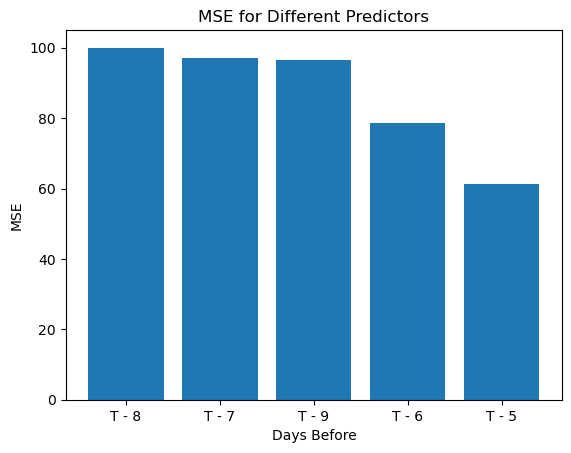

In [12]:
sorted_MSE = {k: v for k, v in sorted(MSE.items(), key=lambda item: item[1], reverse=True)}
keys = list(sorted_MSE.keys())
values = list(sorted_MSE.values())

# Plot the bar chart
plt.bar(keys, values)
plt.xlabel('Days Before')
plt.ylabel('MSE')
plt.title('MSE for Different Predictors')
plt.show()

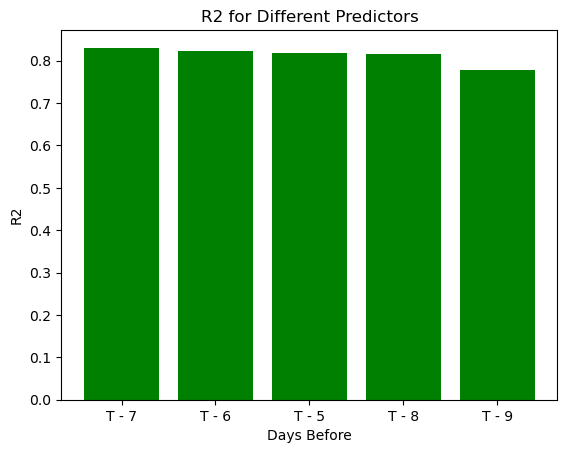

In [13]:
sorted_R2 = {k: v for k, v in sorted(R2.items(), key=lambda item: item[1], reverse=True)}
keys = list(sorted_R2.keys())
values = list(sorted_R2.values())

# Plot the bar chart
plt.bar(keys, values, color='green')
plt.xlabel('Days Before')
plt.ylabel('R2')
plt.title('R2 for Different Predictors')
plt.show()

The charts show that T-5, T-6, and T-9 have the lowest level of error (MSE). In fact, the sooner the prediction is, the more accurate the results will be, except T-9 which has the lower error than T-7, and T-8. In terms of goodness of fit, the R-squared for T-7, T-6, and T-5 exhibits the top 3 models (with minimal difference). Altogether, the T-9 and T-5 are better models to use, in my opinion.

## Time-Series vs. Regression

In [15]:
Dataset.columns

Index(['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12',
       'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5',
       'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual'],
      dtype='object')

In [160]:
temp = Dataset[[ 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12',
       'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7']]
temp_diff = temp.diff(axis=1).drop(['T - 28'], axis=1)
temp_diff.columns = temp_diff.add_prefix('Diff_').columns

In [161]:
# Convert column "DOW" to dummy variables
#dummies = pd.get_dummies(Dataset['DOW'])

# Concatenate dummy variables with original dataframe, excluding column "A"
df = pd.concat([Dataset.drop(['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12',
       'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5',
       'T - 4', 'T - 3', 'T - 2', 'T - 1'], axis=1), temp_diff], axis=1)
df

,SurgDate,DOW,Actual,Diff_T - 21,Diff_T - 14,Diff_T - 13,Diff_T - 12,Diff_T - 11,Diff_T - 10,Diff_T - 9,Diff_T - 8,Diff_T - 7
0,2011-10-10,Mon,106,7,15,3,2,5,3,0,0,7
1,2011-10-11,Tue,121,12,18,3,10,4,0,0,4,3
2,2011-10-12,Wed,126,17,11,8,10,0,0,2,13,7
3,2011-10-13,Thu,114,20,17,5,2,0,0,10,5,4
4,2011-10-14,Fri,106,9,10,0,0,4,8,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
236,2012-09-10,Mon,118,16,19,3,11,2,2,0,0,0
237,2012-09-11,Tue,108,25,12,2,4,4,0,0,0,2
238,2012-09-12,Wed,121,10,20,9,3,1,0,0,3,3
239,2012-09-13,Thu,114,17,17,9,-2,0,0,4,10,3


### Correlation Matix

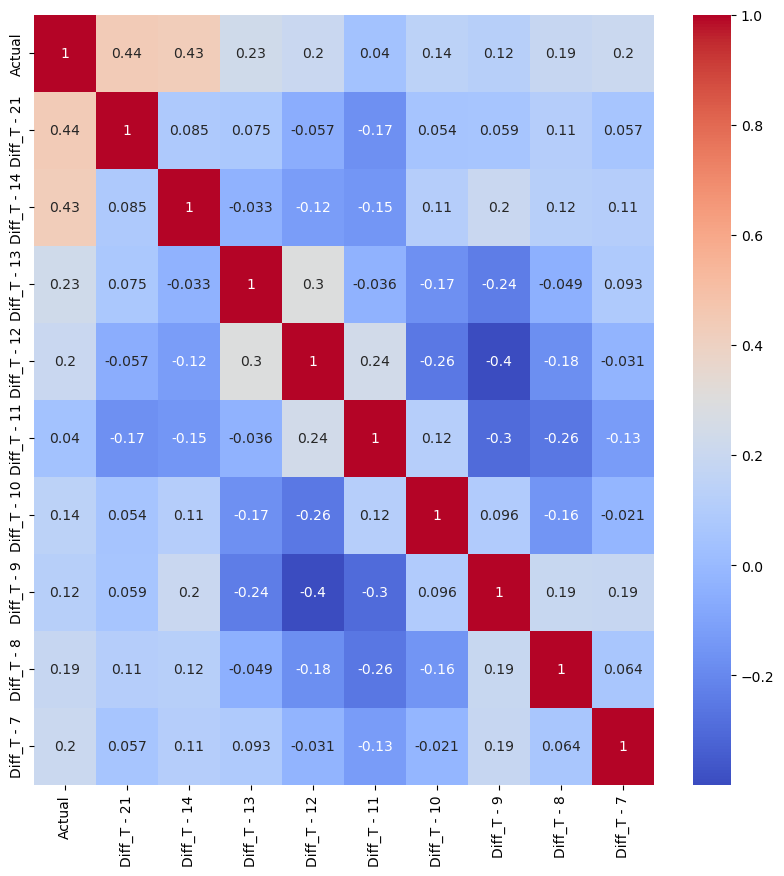

In [162]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

-----------------------------------------------

The correlation matrix shows that by calculating the difference between two columns, the predictores are not highly correlated anymore and the multicollinearity issue has been mitigated. Thus, we can use them in the regression model.

### Model 1: Does not stratify by the day of the week.

In [170]:
X = df.drop(['Actual', 'SurgDate', 'DOW'], axis=1)
y = df['Actual']
    
# Fit the simple linear regression model
model_n = sm.OLS(y, sm.add_constant(X)).fit()

# Calculate the mean squared error (MSE)
y_pred_n = model_n.predict(sm.add_constant(X))
mse = np.mean((y_pred_n - y.values)**2)
# Calculate the R-squared (R2) value
r2 = model.rsquared

print("The model 1 has the MSE of {} and R2 of {}.\n\n".format(round(mse , 2) , round(r2 , 2)))
print(model_n.summary())


The model 1 has the MSE of 134.96 and R2 of 0.56.


                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     33.20
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           4.88e-37
Time:                        23:19:40   Log-Likelihood:                -933.01
No. Observations:                 241   AIC:                             1886.
Df Residuals:                     231   BIC:                             1921.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [171]:
y_pred_n

0      104.577108
1      125.089344
2      138.442623
3      127.967512
4      104.282357
          ...    
236    126.735928
237    120.174833
238    113.516237
239    120.094750
240    110.739108
Length: 241, dtype: float64

### Model 2: Stratified by the day of the week.

In [168]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

for d in days:
    df2 = df[df['DOW']==d]
    X = df2.drop(['Actual', 'SurgDate', 'DOW'], axis=1)
    y = df2['Actual']
 
    
    # Fit the simple linear regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Calculate the mean squared error (MSE)
    y_pred = model.predict(sm.add_constant(X))
    mse = np.mean((y_pred - y.values)**2)
    # Calculate the R-squared (R2) value
    r2 = model.rsquared

    print("The model 2 for **{}** has the MSE of {} and R2 of {}.\n\n".format(d, round(mse , 2) , round(r2 , 2)))
    print(model.summary())
    print("")
    print("")

The model 2 for **Mon** has the MSE of 143.17 and R2 of 0.57.


                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     5.462
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           9.08e-05
Time:                        22:48:45   Log-Likelihood:                -183.34
No. Observations:                  47   AIC:                             386.7
Df Residuals:                      37   BIC:                             405.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

--------------------------------
The regression model for Thursdays has the lowest error. The above models are more accurate than the models discussed in the class because the correlation between predictors have been mitigated and number of predictors have increased.

## Moving Average (MA) model

In [70]:
train_data = Dataset[Dataset["SurgDate"].between('2011-10-10', '2012-09-03')].set_index(["SurgDate"])['Actual']

test_data = Dataset[Dataset["SurgDate"].between('2012-09-04', '2012-09-14')].set_index(["SurgDate"])['Actual']

First, we try the moving average with different N to find the best model with the lowest MSE/MAPE :

In [71]:
x = train_data

MSE={}
MAPE={}
for n in range(3, 11):
    diff = x - x.rolling(n).mean()
    diff_percent = abs(diff) / x
    diff = diff.fillna(0)
    diff_percent = diff_percent.fillna(0)
    mse = np.mean(diff**2)
    mape = diff_percent.mean()
    MSE[n] = mse
    MAPE[n] = mape



MAPE

{3: 0.1400446756157372,
 4: 0.156648503994813,
 5: 0.1612687544404918,
 6: 0.1595298765971323,
 7: 0.17016900391668854,
 8: 0.17602172139695868,
 9: 0.17799455631670283,
 10: 0.1808195816551604}

In [72]:
MSE

{3: 175.23371647509595,
 4: 208.9151400862069,
 5: 225.17948275862042,
 6: 224.65038314176277,
 7: 242.9277797325825,
 8: 255.73296066810346,
 9: 260.10908897403186,
 10: 269.93728448275846}

**So, the N=3 provides the best results:**

In [148]:
MA_3D = test_data.rolling(3).mean().shift().rename('MA_3D')
test_data_new = pd.concat([test_data ,MA_3D ], axis=1)


In [109]:
diff = ( test_data_new['Actual'] - test_data_new['MA_3D'] )
mse = np.mean(diff**2)
print("the MSE for Moving Average(3) is {}.".format(round(mse,2)))

the MSE for Moving Average(3) is 87.39.


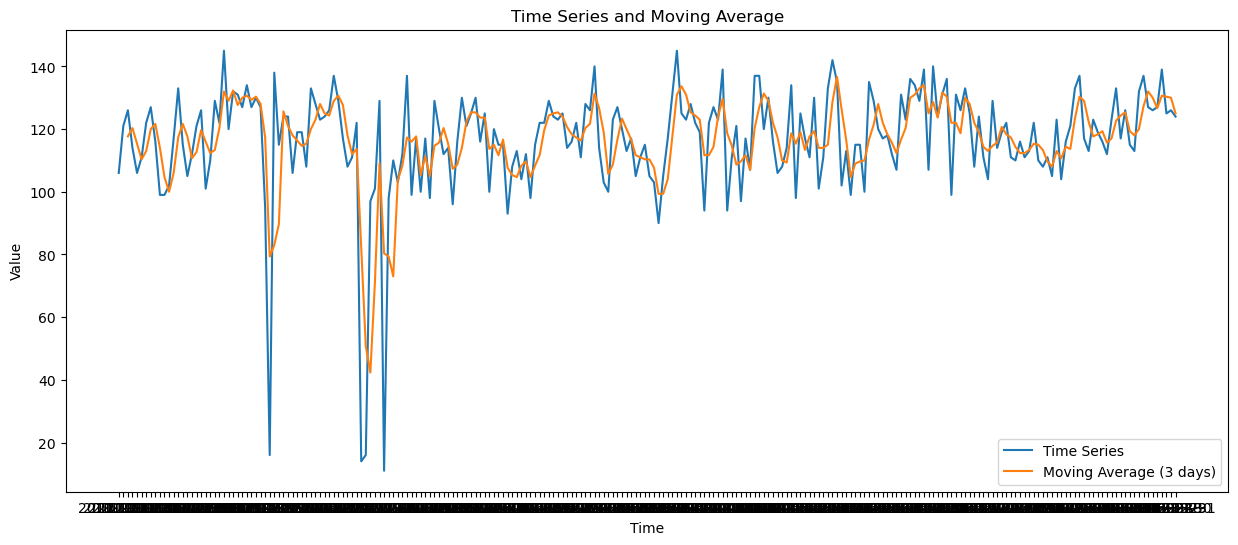

In [183]:
# plot the time series and moving average
plt.figure(figsize=(15, 6))
plt.plot(train_data, label='Time Series')
plt.plot(train_data.rolling(3).mean(), label='Moving Average (3 days)')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series and Moving Average')
plt.show()

## Comparing the result of the regression model with the MA model

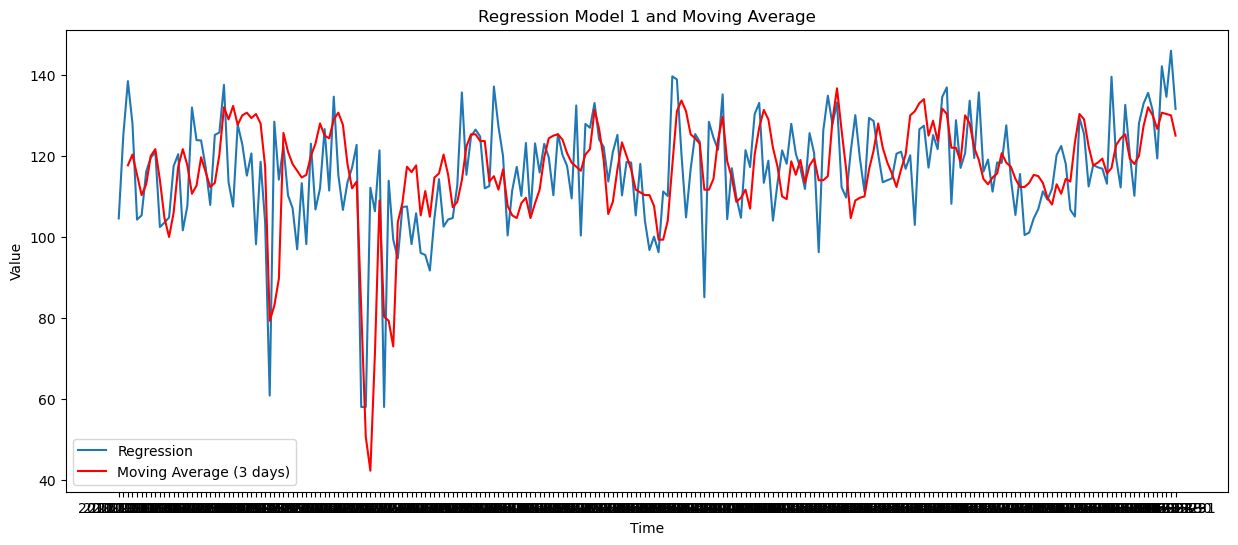

In [182]:
# plot the regression model 1 and moving average
plt.figure(figsize=(15, 6))
plt.plot(y_pred_n[:232,], label='Regression')
plt.plot(train_data.rolling(3).mean(), label='Moving Average (3 days)', color='red')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Regression Model 1 and Moving Average')
plt.show()

The MSE of the test set in the moving average model is **87.39** while the regression **model 1** shows the higher error, therfore we can claim that the moving average could better explain the variations in the data. One possible explaination is that the actual surgeries time series do not have a trend and fluctuate around a definite average. In this case, the movong average can predict the values more accurately than a regression model.